In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset = pd.read_csv('Titanic.csv')

In [3]:
dataset.shape

(891, 12)

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Here we will check the percentage of nan values present in each feature
# 1 -step make the list of features which has missing values
features_with_na = [ features for features in dataset.columns if dataset[features].isnull().sum()>1]

# 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4), '% missing values')

Age 0.1987 % missing values
Cabin 0.771 % missing values
Embarked 0.0022 % missing values


In [11]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

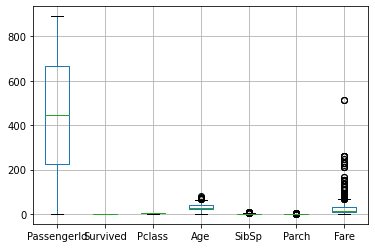

In [17]:
dataset.boxplot()

In [18]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [19]:
dataset.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [20]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [21]:
dataset.Age = dataset.Age.fillna(dataset.Age.mean())

In [22]:
dataset.Age.isnull().sum()

0

In [23]:
dataset.Sex = dataset.Sex.map({'male': 1, 'female': 2})

In [24]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,2,38.0,71.2833
2,1,3,2,26.0,7.9250
3,1,1,2,35.0,53.1000
4,0,3,1,35.0,8.0500


In [25]:
X = dataset.drop('Survived', axis='columns')
y = dataset.Survived

In [26]:
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [27]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
len(X_train)

712

In [33]:
len(X_test)

179

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [35]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

#### SCORE ( IN SAMPLE R^2 , OUT SAMPLE R^2 )

In [36]:
m = model.score(X_train, y_train)

In [37]:
m

0.8033707865168539

In [38]:
m1 = model.score(X_test, y_test)
m1

0.776536312849162

In [40]:
y_predict = model.predict(X_test) # for given x we have to predict y thats y we take x test

### Confusion Matrix

In [42]:
cm = metrics.confusion_matrix(y_test, y_predict)
cm

array([[88, 13],
       [27, 51]], dtype=int64)

### Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
model1 = GaussianNB()

In [45]:
model1.fit(X_train, y_train)

GaussianNB()

#### SCORE ( IN SAMPLE R^2 , OUT SAMPLE R^2 )

In [47]:
m2 = model1.score(X_train, y_train)
m2

0.776685393258427

In [48]:
m3 = model1.score(X_test, y_test)
m3

0.770949720670391

#### Confusion Matrix

In [53]:
y_predict = model1.predict(X_test)

In [54]:
cm1 = metrics.confusion_matrix(y_test, y_predict)
cm1

array([[82, 19],
       [22, 56]], dtype=int64)

### Decision Tree

In [56]:
from sklearn import tree

In [57]:
model2 = tree.DecisionTreeClassifier()

In [58]:
model2.fit(X_train, y_train)

DecisionTreeClassifier()

#### SCORE ( IN SAMPLE R^2 , OUT SAMPLE R^2 )

In [59]:
m4 = model2.score(X_train, y_train)
m4

0.9789325842696629

In [60]:
m5 = model2.score(X_test, y_test)
m5

0.770949720670391

#### Confusion Matrix

In [61]:
y_predict = model2.predict(X_test)

In [62]:
cm2 = metrics.confusion_matrix(y_test, y_predict)
cm2

array([[80, 21],
       [20, 58]], dtype=int64)

### K NEAREST NEIGHBOR CLASSIFIER

In [55]:
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier

In [63]:
Xscaled = X.apply(zscore)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=1)

In [77]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

#### SCORE ( IN SAMPLE R^2 , OUT SAMPLE R^2 )

In [78]:
m6 = knn.score(X_train, y_train)
m6

0.9845505617977528

In [79]:
m7 = knn.score(X_test, y_test)
m7

0.7988826815642458

#### Confusion Matrix

In [80]:
y_predict = knn.predict(X_test)

In [81]:
cm3 = metrics.confusion_matrix(y_test, y_predict)
cm3

array([[92, 14],
       [22, 51]], dtype=int64)